# Python for Data Science

## Lecture 7: NetworkX

In [5]:
import numpy as np
import random as rn

## Data structures for graphs

We have multiple choices, each with its own advantages and drawbacks.


## Option 1: list of edges
We store the edges of a graph in a list. 

In [6]:
graph_edgelist=[("a","b"),("b","c"),("c","d"),("d","b"),("b","e")]

In [8]:
def maxdegree1(l):
    d={}
    for edge in l:
        if edge[0] in d:
            d[edge[0]]=d[edge[0]]+1
        else:
            d[edge[0]]=1
        if edge[1] in d:
            d[edge[1]]=d[edge[1]]+1
        else:
            d[edge[1]]=1
    return max(d,key=lambda x:d[x])        

In [9]:
maxdegree1(graph_edgelist)

'b'

## Option 2: Adjacency list
We list the neighbours of each vertex. 

In [11]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        } 

In [12]:
def maxdegree2(l):
    return max(l,key=lambda x: len(l[x]) ) 

In [13]:
maxdegree2(graph)

'c'

In [14]:
usa={"AL" : [ "FL", "GA", "TN", "MS" ],
"AK" : [ ],
"AZ" : [ "NM", "UT", "NV", "CA" ],
"AR" : [ "LA", "MS", "TN", "MO", "OK", "TX" ],
"CA" : [ "AZ", "NV", "OR" ],
"CO" : [ "NM", "OK", "KS", "NE", "WY", "UT" ],
"CT" : [ "RI", "MA", "NY" ],
"DE" : [ "NJ", "PA", "MD" ],
"DC" : [ "MD", "VA" ],
"FL" : [ "GA", "AL" ],
"GA" : [ "SC", "NC", "TN", "AL", "FL" ],
"HI" : [ ],
"ID" : [ "WA", "OR", "NV", "UT", "WY", "MT" ],
"IL" : [ "WI", "IA", "MO", "KY", "IN" ],
"IN" : [ "IL", "KY", "OH", "MI" ],
"IA" : [ "MN", "SD", "NE", "MO", "IL", "WI" ],
"KS" : [ "OK", "MO", "NE", "CO" ],
"KY" : [ "TN", "VA", "WV", "OH", "IN", "IL", "MO" ],
"LA" : [ "MS", "AR", "TX" ],
"ME" : [ "NH" ],
"MD" : [ "DE", "PA", "WV", "VA", "DC" ],
"MA" : [ "NH", "VT", "NY", "CT", "RI" ],
"MI" : [ "WI", "IN", "OH" ],
"MN" : [ "ND", "SD", "IA", "WI" ],
"MS" : [ "AL", "TN", "AR", "LA" ],
"MO" : [ "AR", "TN", "KY", "IL", "IA", "NE", "KS", "OK" ],
"MT" : [ "ID", "WY", "SD", "ND" ],
"NE" : [ "KS", "MO", "IA", "SD", "WY", "CO" ],
"NV" : [ "AZ", "UT", "ID", "OR", "CA" ],
"NH" : [ "VT", "MA", "ME" ],
"NJ" : [ "NY", "PA", "DE" ],
"NM" : [ "TX", "OK", "CO", "AZ" ],
"NY" : [ "PA", "NJ", "CT", "MA", "VT" ],
"NC" : [ "VA", "TN", "GA", "SC" ],
"ND" : [ "MT", "SD", "MN" ],
"OH" : [ "MI", "IN", "KY", "WV", "PA" ],
"OK" : [ "TX", "AR", "MO", "KS", "CO", "NM" ],
"OR" : [ "CA", "NV", "ID", "WA" ],
"PA" : [ "OH", "WV", "MD", "DE", "NJ", "NY" ],
"RI" : [ "MA", "CT" ],
"SC" : [ "NC", "GA" ],
"SD" : [ "NE", "IA", "MN", "ND", "MT", "WY" ],
"TN" : [ "AL", "GA", "NC", "VA", "KY", "MO", "AR", "MS" ],
"TX" : [ "LA", "AR", "OK", "NM" ],
"UT" : [ "AZ", "CO", "WY", "ID", "NV", "" ],
"VT" : [ "NY", "MA", "NH" ],
"VA" : [ "MD", "DC", "WV", "KY", "TN", "NC" ],
"WA" : [ "OR", "ID" ],
"WV" : [ "VA", "MD", "PA", "OH", "KY" ],
"WI" : [ "MN", "IA", "IL", "MI" ],
"WY" : [ "CO", "NE", "SD", "MT", "ID", "UT" ]}

In [15]:
maxdegree2(usa)

'MO'

## Option 3: Adjacency matrix


In [16]:
graphneigh=np.array([[0,0,1,1],[0,0,0,1],[1,0,0,1],[1,1,1,0]])

In [17]:
graphneigh

array([[0, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]])

In [18]:
def maxdegree3(A):
    return A.sum(axis=0).argmax()

In [20]:
maxdegree3(graphneigh)

3

## Which to choose when?
This always needs to be decided based on the use case.

![interpreted](graf.jpg)

**Adjacency matrix**
 - It is slow to add or remove vertices as it requires resizing of the array
 - Higher memory usage
 - Faster look-up of the edges
 - It is not avoidable if we want to make algebral operations (e.g. spectrum or eigenvalues of the graph)
 - Useful for dense matrices (many edges, e.g. square of the vertices)

**Adjacency list**
 - We can add or remove vertices quickly
 - Lower memory usage
 - Slower look-up
 - Useful for sparse matrices (less edges, e.g. linear to the number of vertices)
 

## Option 4: use an already implemented soluton - NetworkX

There are multiple libraries created to handle graphs, we present one example.

The NetworkX uses adjacency list in the background to represent the graph. 

"The graph internal data structures are based on an adjacency list representation and implemented using Python dictionary datastructures. The graph adjacency structure is implemented as a Python dictionary of dictionaries; the outer dictionary is keyed by nodes to values that are themselves dictionaries keyed by neighboring node to the edge attributes associated with that edge. This “dict-of-dicts” structure allows fast addition, deletion, and lookup of nodes and neighbors in large graphs. The underlying datastructure is accessed directly by methods (the programming interface “API”) in the class definitions. All functions, on the other hand, manipulate graph-like objects solely via those API methods and not by acting directly on the datastructure. This design allows for possible replacement of the ‘dicts-of-dicts’-based datastructure with an alternative datastructure that implements the same methods."

In [21]:
import networkx as nx            # For graphs
import matplotlib.pyplot as plt  # For plotting
import warnings                  # NetworkX's plotting function uses some obsolete code, which raises constant warnings.
warnings.simplefilter('ignore')  # We do not need to be concerned about this, thus we block them.

It has four graph related data structures:
- `Graph` undirected, two vertices may not be connected with multiple edges            
- `DiGraph` directed, two vertices may not be connected with multiple edges
- `MultiGraph` undirected, multigraph edges allowed
- `MultiDiGraph` directed, multigraph edges allowed

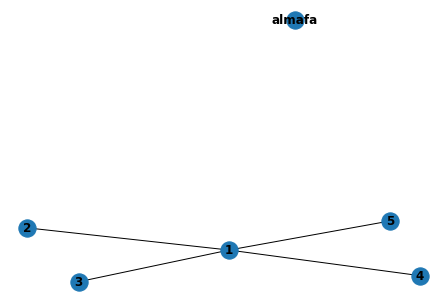

In [22]:
G=nx.Graph()
G.add_node(3)                       # Any hashable type can be a node
G.add_node("almafa")                       # Any hashable type can be a node 
G.add_edge(1,2)
G.add_edges_from([(1,4),(1,3)])
G.add_edge(1,5)
nx.draw(G, with_labels=True, font_weight='bold')

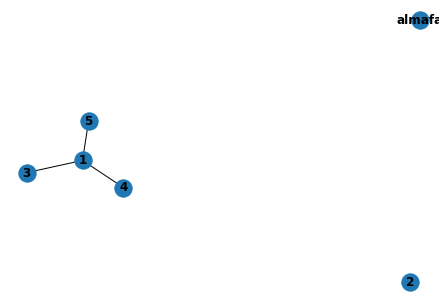

In [23]:
G.remove_edge(1,2)
nx.draw(G, with_labels=True, font_weight='bold')

### Attributes
You can assign attributes to any graph, vertex, or edge. This is particularly useful when you need a weighted graph. 


In [24]:
G.add_node("x", time='5pm')
G.nodes["x"]

{'time': '5pm'}

In [25]:
G.add_edge(2, 3, weight=0.9)  # specify edge data
G.add_edge(2, 7, color="green") 
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

### Accessing data, iteration

In [26]:
G.edges()     #This function lets you access the edges, but does not let you modify them.

EdgeView([(3, 1), (3, 2), (1, 4), (1, 5), (2, 7), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [27]:
G.nodes()

NodeView((3, 'almafa', 1, 2, 4, 5, 'x', 7, 'a', 'b', 'c', 'd'))

In [28]:
G.number_of_nodes()

12

In [29]:
print(G[3])
print(G.edges[2,3])
print(G.edges[2,3]["weight"])

G.edges[1, 4]['weight'] = 4
print(G.edges[1,4]["weight"])


{1: {}, 2: {'weight': 0.9}}
{'weight': 0.9}
0.9
4


In [30]:
for e in G.edges.items():
      print(e)

((3, 1), {})
((3, 2), {'weight': 0.9})
((1, 4), {'weight': 4})
((1, 5), {})
((2, 7), {'color': 'green'})
(('a', 'b'), {'weight': 5.0})
(('a', 'c'), {'weight': 1.0})
(('b', 'c'), {'weight': 3.0})
(('c', 'd'), {'weight': 7.3})


In [31]:
for u, v, weight in G.edges.data('weight'):
    if weight is not None:
        print(u,v)
        pass

3 2
1 4
a b
a c
b c
c d


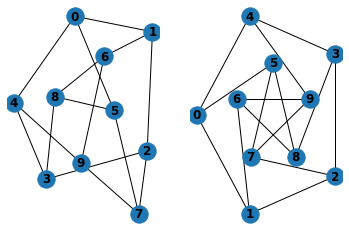

In [33]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [34]:
G.degree()

DegreeView({0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3})

In [35]:
degree_sequence = list(G.degree())
nb_nodes = len(degree_sequence)
nb_arr = len(G.edges())
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])

In [36]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 10
Number of edges : 15
Maximum degree : 3
Minimum degree : 3
Average degree : 3.0
Median degree : 3.0


### Built-in algorythms of NetworkX
Find the full list [Here](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)

In [37]:
nx.shortest_path(G)

{0: {0: [0],
  1: [0, 1],
  4: [0, 4],
  5: [0, 5],
  2: [0, 1, 2],
  6: [0, 1, 6],
  3: [0, 4, 3],
  9: [0, 4, 9],
  7: [0, 5, 7],
  8: [0, 5, 8]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  6: [1, 6],
  4: [1, 0, 4],
  5: [1, 0, 5],
  3: [1, 2, 3],
  7: [1, 2, 7],
  8: [1, 6, 8],
  9: [1, 6, 9]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  7: [2, 7],
  0: [2, 1, 0],
  6: [2, 1, 6],
  4: [2, 3, 4],
  8: [2, 3, 8],
  5: [2, 7, 5],
  9: [2, 7, 9]},
 3: {3: [3],
  2: [3, 2],
  4: [3, 4],
  8: [3, 8],
  1: [3, 2, 1],
  7: [3, 2, 7],
  0: [3, 4, 0],
  9: [3, 4, 9],
  5: [3, 8, 5],
  6: [3, 8, 6]},
 4: {4: [4],
  0: [4, 0],
  3: [4, 3],
  9: [4, 9],
  1: [4, 0, 1],
  5: [4, 0, 5],
  2: [4, 3, 2],
  8: [4, 3, 8],
  6: [4, 9, 6],
  7: [4, 9, 7]},
 5: {5: [5],
  0: [5, 0],
  7: [5, 7],
  8: [5, 8],
  1: [5, 0, 1],
  4: [5, 0, 4],
  2: [5, 7, 2],
  9: [5, 7, 9],
  3: [5, 8, 3],
  6: [5, 8, 6]},
 6: {6: [6],
  1: [6, 1],
  8: [6, 8],
  9: [6, 9],
  0: [6, 1, 0],
  2: [6, 1, 2],
  3: [6, 8, 3],
  5: [

In [38]:
for l in  nx.enumerate_all_cliques(G):
    print(l)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 1]
[0, 4]
[0, 5]
[1, 2]
[1, 6]
[2, 3]
[2, 7]
[3, 4]
[3, 8]
[4, 9]
[5, 7]
[5, 8]
[6, 8]
[6, 9]
[7, 9]


[4, 2, 0, 0, 1, 3, 1, 3]

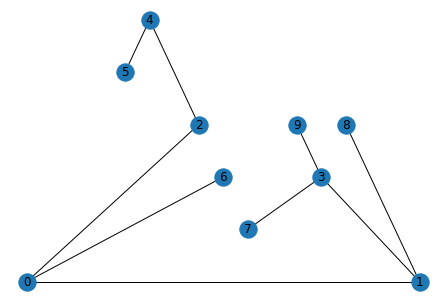

In [41]:
n=10
T=nx.Graph()
T.add_nodes_from(range(n))
for i in range(1,n):
    T.add_edge(i,rn.randrange(i))
nx.draw_planar(T, with_labels=True, width=1 )
nx.to_prufer_sequence(T)

In [42]:
nx.check_planarity(G)

(False, None)

#### Plotting 

- `draw(G, keywrds)`
- `raw_circular(G, keywrds)`  
- `draw_planar(G, keywrds)` 
- `draw_random(G, keywrds)`  
- `draw_spectral(G, keywrds)` 
- `draw_spring(G, keywrds)` 
- `draw_shell(G, keywrds)` 

In [43]:
g = nx.Graph()
g.add_nodes_from(usa.keys())

for k, v in usa.items():
    g.add_edges_from(([(k, t) for t in v]))

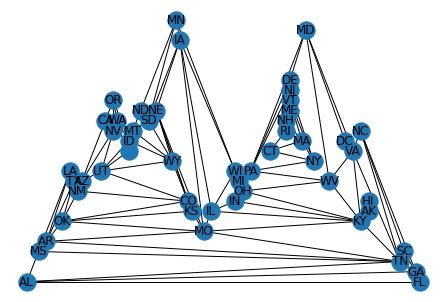

In [44]:
nx.draw_planar(g, with_labels=True, width=1 )

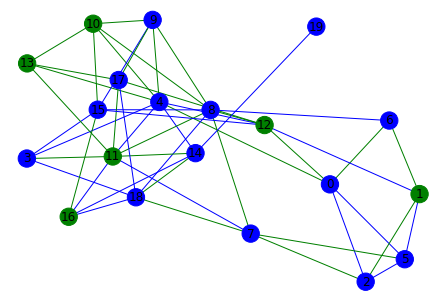

In [45]:
G = nx.erdos_renyi_graph(20, 0.3)
color_map = []
edge_map = []
for edge in G.edges():
    if rn.randrange(2)%2==0:
        edge_map.append('blue')
    else:     
        edge_map.append('green')
   
for node in G:
    if rn.randrange(2)%2==0:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map,edge_color=edge_map, with_labels=True)


# Option 5: Graph algorythms without graphs

Many times it's not worth to actually generate the graph, as we can still run the graph algorythms on the data itself. Example: how to make a labyrinth with depth-first search.

In [46]:
# Labyrinth plotter. It expects a numpy array consisting of 0/1/2: 0-nothing, 1-wall, 2-position 
def printmaze(a):
    def selector(c):
        if c==0:
            return ' '
        if c==1:
            return chr(0x2588)
        if c==2:
            return "x"
    for row in a:
        print("".join([selector(c) for c in row]))
    #    print("".join(["  " if c==0 else chr(0x2B1B) for c in row]))
printmaze(np.array([[1,1,1],[1,0,1],[1,1,1]]))                

███
█ █
███


In [47]:
#Labirinth
def makemaze(w=16,h=8):
    maze=np.ones((2*w+1,2*h+1))
    vis=np.zeros((2*w+1,2*h+1))
 
    def walk(x, y):
        vis[x][y] = 1
        maze[x,y]=0
          
        d = [(x - 2, y), (x, y + 2), (x + 2, y), (x, y - 2)]
        rn.shuffle(d)
        
        for (xx, yy) in d:
            if (not xx in range(2*w+1)) or (not yy in range(2*h+1)) or vis[xx][yy]: 
                continue
            if xx == x: 
                maze[x][max(y, yy)-1] = 0
            if yy == y: 
                maze[max(x, xx)-1][y] = 0
            walk(xx, yy)
 
    walk(2*rn.randrange(w)+1, 2*rn.randrange(h)+1)
 
    return maze


In [48]:
printmaze(makemaze(4,40))

█████████████████████████████████████████████████████████████████████████████████
█       █   █   █   █       █   █   █         █       █     █           █   █   █
█ █████ █ █ █ █ █ █ █ ███ █ ███ ███ █ ███████ █████ █ █ █ █ █████████ █ ███ █ █ █
█ █     █ █   █   █ █ █   █       █   █   █   █   █ █   █ █       █   █   █   █ █
███ ███ █ █████████ █ █ ███ ███████████ ███ ███ █ █████ █ ███████ █ █████ █████ █
█   █   █   █   █ █   █   █ █         █     █   █ █   █ █     █   █ █   █       █
█ █████████ █ █ █ ███████ ███ ███████ █ █████ ███ █ █ ███████ █ ███ █ █████████ █
█             █         █           █         █     █         █     █           █
█████████████████████████████████████████████████████████████████████████████████


In [50]:
def makemaze2(w=16,h=8,entry=0,inner=0):
    maze=np.ones((2*w+1,2*h+1))
    vis=np.zeros((2*w+1,2*h+1))
 
    def walk(x, y):
        vis[x][y] = 1
        maze[x,y]=0
          
        d = [(x - 2, y), (x, y + 2), (x + 2, y), (x, y - 2)]
        rn.shuffle(d)
        
        for (xx, yy) in d:
            if (not xx in range(2*w+1)) or (not yy in range(2*h+1)) or vis[xx][yy]: 
                continue
            if xx == x: 
                maze[x][max(y, yy)-1] = 0
            if yy == y: 
                maze[max(x, xx)-1][y] = 0
            walk(xx, yy)
 
    walk(2*rn.randrange(w)+1, 2*rn.randrange(h)+1)
    
    ### entries
    for i in range(entry):
        if rn.randrange(2)==0:
            pos=rn.randrange(h)
            if rn.randrange(2)==0:
                maze[2*pos+1,0]=0
            else:
                maze[2*pos+1,-1]=0
        else:    
            pos=rn.randrange(w)
            if rn.randrange(2)==0:
                maze[0,2*pos+1]=0
            else:
                maze[-1,2*pos+1]=0
    
    ### wall deletion for inner circles
    for i in range(inner):
        if rn.randrange(2)==0:
            maze[2*rn.randrange(h-1)+2,2*rn.randrange(w)+1]=0
        else:
            maze[2*rn.randrange(h)+1,2*rn.randrange(w-1)+2]=0
    return maze


In [76]:
printmaze(makemaze2(10,10,2,3))

███████████ █████████
█ █             █   █
█ █ ███ ███████ █ ███
█ █   █     █   █   █
█ ███ █████ █ █████ █
█   █   █ █ █       █
█ █████ █ █ █████████
█   █   █ █         █
███ █ ███ █████████ █
█   █     █         █
█ █ ███ ███ █████████
█   █   █ █   █     █
█ ███ ███ █ █ █ ███ █
█     █   █ █   █   █
█ █████ █████ ███ █ █
█ █   █     █ █ █ █  
█ █ ███████ █ █ █ ███
█ █       █ █   █   █
█ ███████ █ ███████ █
█         █         █
█████████████████████
